# Training the hand gestures model with Turi Create

On the small dataset this model gets 100% training accuracy, 80% test set accuracy (3 out of 15 images wrong).

In [1]:
import turicreate as tc

%matplotlib inline
import matplotlib.pyplot as plt

import os

In [2]:
tc.__version__, tc.version_info.build_number

('5.6', '70491')

## Load the training set

In [3]:
train_data = tc.image_analysis.load_images("../Dataset/train", with_path=True)

In [4]:
train_data["label"] = train_data["path"].apply(lambda path: os.path.basename(os.path.split(path)[0]))

In [5]:
train_data.head()

path,image,label
../Dataset/train/✊/07E9762F-F528-492A-B6BF-72E ...,Height: 224 Width: 224,✊
../Dataset/train/✊/2DBC4403-2549-43BF-A3B4-871 ...,Height: 224 Width: 224,✊
../Dataset/train/✊/48D7289A-4724-4AAB-9B53-E0C ...,Height: 224 Width: 224,✊
../Dataset/train/✊/4F54FB78-EAA2-403A-84DF-356 ...,Height: 224 Width: 224,✊
../Dataset/train/✊/765B63CA-F3B9-4C96-9A4B-095 ...,Height: 224 Width: 224,✊
../Dataset/train/✊/85D131B4-B828-4724-9FB9-82A ...,Height: 224 Width: 224,✊
../Dataset/train/✊/8FDEEF3B-8679-40A2-9671-51B ...,Height: 224 Width: 224,✊
../Dataset/train/✊/AF3D0888-14E3-4717-B2DF-9D4 ...,Height: 224 Width: 224,✊
../Dataset/train/✊/E42439A2-BF2D-4E36-8BEE-D96 ...,Height: 224 Width: 224,✊
../Dataset/train/✊/FF94A237-E25E-4D0D-9A5B-109 ...,Height: 224 Width: 224,✊


In [6]:
len(train_data)

30

In [7]:
train_data["label"].summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |   30  |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   3   |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+-------+
| value | count |
+-------+-------+
|   ✊   |   10  |
|   ✋   |   10  |
|   ✌️  |   10  |
+-------+-------+


## Load the test set

In [8]:
test_data = tc.image_analysis.load_images("../Dataset/test", with_path=True)
test_data["label"] = test_data["path"].apply(lambda path: os.path.basename(os.path.split(path)[0]))

In [9]:
test_data["label"].summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |   15  |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   3   |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+-------+
| value | count |
+-------+-------+
|   ✊   |   5   |
|   ✋   |   5   |
|   ✌️  |   5   |
+-------+-------+


## Explore the training data

In [10]:
# Explore interactively -- this is only supported on macOS.
train_data.explore()

Materializing SFrame

Look at an image:

In [11]:
img = train_data[7]["image"]
img, type(img), type(img.pixel_data), img.pixel_data.dtype

(Height: 224px
 Width: 224px
 Channels: 3,
 turicreate.data_structures.image.Image,
 numpy.ndarray,
 dtype('uint8'))

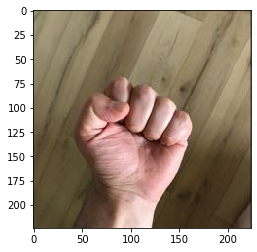

In [12]:
plt.imshow(img.pixel_data)

## Train the model

In [13]:
model_type = "squeezenet_v1.1"

In [14]:
%time model = tc.image_classifier.create(train_data, target="label", model=model_type, \
                                         verbose=True, max_iterations=100)

Downloading base mlmodel

Downloading https://docs-assets.developer.apple.com/coreml/models/SqueezeNet.mlmodel to /var/folders/2h/jdd0ymmj2bgck8148622rkbr0000gn/T/model_cache/squeezenet_v1.1.mlmodel

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 30               | 988.812ms    | 100%             |

+------------------+--------------+------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 30

Number of classes           : 3

Number of feature columns   : 1

Number of unpacked features : 1000

Number of coefficients      : 2002

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy |

+-----------+----------+-----------+--------------+-------------------+

| 0         | 5        | 0.031155  | 0.048297     | 0.333333          |

| 1         | 9        | 0.654254  | 0.115815     | 0.500000          |

| 2         | 10       | 0.817817  | 0.133054     | 0.533333          |

| 3         | 11       | 1.000000  | 0.150392     | 0.466667          |

| 4         | 12       | 1.000000  | 0.167503     | 0.633333          |

| 9         | 21       | 1.000000  | 0.286280     | 1.000000          |

| 28        | 52       | 0.777266  | 0.705312     | 1.000000          |

+-----------+----------+-----------+--------------+-------------------+

CPU times: user 3.5 s, sys: 442 ms, total: 3.94 s
Wall time: 5.71 s


In [15]:
model.summary()

Class                                    : ImageClassifier

Schema
------
Number of classes                        : 3
Number of feature columns                : 1
Input image shape                        : (3, 227, 227)

Training summary
----------------
Number of examples                       : 30
Training loss                            : 0.08
Training time (sec)                      : 5.7119



In [16]:
model.classifier

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 2002
Number of examples             : 30
Number of classes              : 3
Number of feature columns      : 1
Number of unpacked features    : 1000

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : lbfgs
Solver iterations              : 28
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.4424

Settings
--------
Log-likelihood                 : 0.08

Highest Positive Coefficients
-----------------------------
__image_features__[625]        : 0.1048
__image_features__[690]        : 0.0763
__image_features__[814]        : 0.0754
__image_features__[537]        : 0.063
__image_features__[665]        : 0.0627

Lowest Negative Coefficients
----------------------------
(intercept)                    : -0.1461
__image_fe

In [17]:
model.input_image_shape

(3, 227, 227)

In [18]:
model.model

'squeezenet_v1.1'

In [30]:
model.classes

['✊', '✋', '✌️']

## Evaluate the trained model

In [19]:
metrics = model.evaluate(train_data)
metrics["accuracy"]

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 30               | 129.124ms    | 100%             |

+------------------+--------------+------------------+

1.0

In [20]:
metrics = model.evaluate(test_data)

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 15               | 67.642ms     | 100%             |

+------------------+--------------+------------------+

In [21]:
for k, v in metrics.items():
    print(k, "\n", v)

accuracy 
 0.8
f1_score 
 0.7712842712842712
log_loss 
 2.168304249990035
precision 
 0.8492063492063493
recall 
 0.7999999999999999
auc 
 0.8866666666666667
roc_curve 
 +-----------+-----+-----+---+----+-------+
| threshold | fpr | tpr | p | n  | class |
+-----------+-----+-----+---+----+-------+
|    0.0    | 1.0 | 1.0 | 5 | 10 |   0   |
|   1e-05   | 0.9 | 1.0 | 5 | 10 |   0   |
|   2e-05   | 0.9 | 1.0 | 5 | 10 |   0   |
|   3e-05   | 0.9 | 1.0 | 5 | 10 |   0   |
|   4e-05   | 0.9 | 1.0 | 5 | 10 |   0   |
|   5e-05   | 0.9 | 1.0 | 5 | 10 |   0   |
|   6e-05   | 0.8 | 1.0 | 5 | 10 |   0   |
|   7e-05   | 0.7 | 1.0 | 5 | 10 |   0   |
|   8e-05   | 0.7 | 1.0 | 5 | 10 |   0   |
|   9e-05   | 0.7 | 1.0 | 5 | 10 |   0   |
+-----------+-----+-----+---+----+-------+
[300003 rows x 6 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.
confusion_matrix 
 +--------------+-----------------+-------+
| target_lab

In [22]:
metrics["confusion_matrix"]

target_label,predicted_label,count
✌️,✌️,2
✊,✊,5
✋,✋,5
✌️,✋,2
✌️,✊,1


In [23]:
predictions = model.predict(test_data)
predictions

dtype: str
Rows: 15
['✊', '✊', '✊', '✊', '✊', '✋', '✋', '✋', '✋', '✋', '✌️', '✋', '✌️', '✊', '✋']

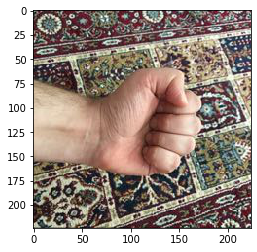

In [24]:
plt.imshow(test_data[1]["image"].pixel_data)

In [25]:
output = model.classify(test_data)
output.print_rows(num_rows=15, num_columns=2)

+-------+--------------------+
| class |    probability     |
+-------+--------------------+
|   ✊   | 0.9912848726817797 |
|   ✊   | 0.5793412617054898 |
|   ✊   | 0.9859986475844094 |
|   ✊   | 0.9852000523353227 |
|   ✊   | 0.8880828876982942 |
|   ✋   | 0.9949661069793513 |
|   ✋   | 0.9976780694870812 |
|   ✋   | 0.9962371267419559 |
|   ✋   | 0.9999426374323075 |
|   ✋   | 0.9946328414630778 |
|   ✌️  | 0.7053126350756357 |
|   ✋   | 0.9920543309266389 |
|   ✌️  | 0.9998941216256824 |
|   ✊   | 0.8397451812432725 |
|   ✋   | 0.9869981347775145 |
+-------+--------------------+
[15 rows x 2 columns]



In [26]:
imgs_with_pred = test_data.add_columns(output)
imgs_with_pred.explore()

Materializing SFrame

## Export to Core ML

In [27]:
model.export_coreml("HandsTuri.mlmodel")

Download completed: /var/folders/2h/jdd0ymmj2bgck8148622rkbr0000gn/T/model_cache/squeezenet_v1.1-symbol.json
Download completed: /var/folders/2h/jdd0ymmj2bgck8148622rkbr0000gn/T/model_cache/squeezenet_v1.1-0000.params
